<a href="https://colab.research.google.com/github/HibaBargaoui/Project-2/blob/main/Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Drive**

In [67]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


**Import Libraries**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

**Load Data**

In [69]:
df = pd.read_csv('/content/MyDrive/MyDrive/Coding Dojo/Datasets/FMCG_data.csv')
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


**Delete unnecessary columns**

In [70]:
df = df.drop(columns = ['Ware_house_ID', 'WH_Manager_ID'])
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


**Delete duplicate rows**

In [71]:
# Check for duplicates
df.duplicated().sum()

0

There is no duplicate rows.

**Identify missing values**

In [72]:
df.isna().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

**Adress missing values**

In [73]:
# Adress the 'approved_wh_govt_certificate' column
df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [74]:
# Fill the 'approved_wh_govt_certificate' with the most frequent value
df['approved_wh_govt_certificate'].fillna(value='C',inplace=True)

In [75]:
# Fill the 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [76]:
# Fill the 'wh_est_year' with the mean
df['wh_est_year'].fillna(value =df['wh_est_year'].mean(),inplace=True)

In [77]:
# Check for missing values
df.isna().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

Identify inconsistencies in data for categorical values

In [78]:
cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for col in cols:
  values = df[col].value_counts()
  print(f'{col}:\n{values}')

Location_type:
Rural    22957
Urban     2043
Name: Location_type, dtype: int64
WH_capacity_size:
Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64
zone:
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64
WH_regional_zone:
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64
wh_owner_type:
Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64
approved_wh_govt_certificate:
C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


There are no inconsistencies in data for categorical values

**Univariate visuals for the target and all features**

The 'Location_type' feature

Text(0.5, 1.0, 'Location Type : Rural or Urban')

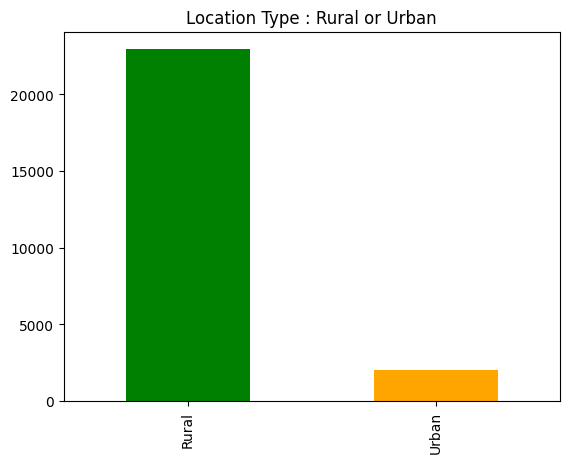

In [79]:
Location_types = df['Location_type'].value_counts()
Location_types.plot(kind='bar',color=['green','orange'])
plt.title('Location Type : Rural or Urban')

The 'WH_capacity_size' feature

Text(0.5, 1.0, 'WH_capacity_size : Large or Mid or Small')

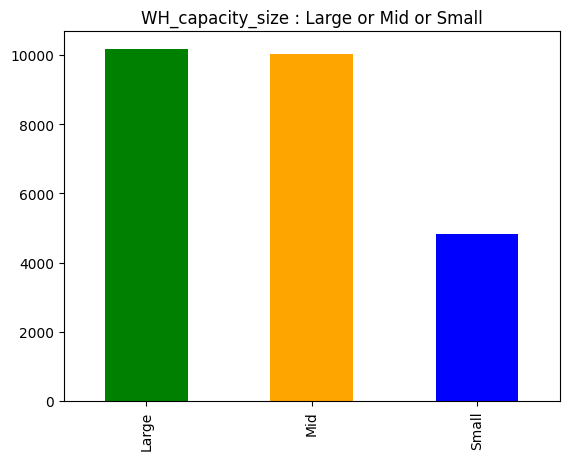

In [80]:
WH_capacity_size = df['WH_capacity_size'].value_counts()
WH_capacity_size.plot(kind='bar',color=['green','orange','blue'])
plt.title('WH_capacity_size : Large or Mid or Small')

The 'zone' column

Text(0.5, 1.0, 'Zone type')

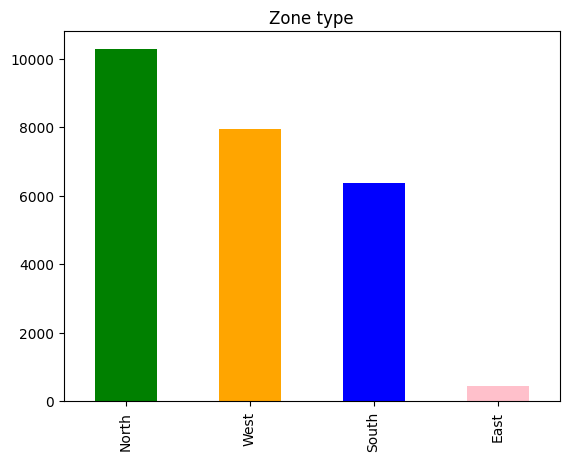

In [81]:
zone = df['zone'].value_counts()
zone.plot(kind='bar',color=['green','orange','blue','pink'])
plt.title('Zone type')

The 'WH_regional_zone' column

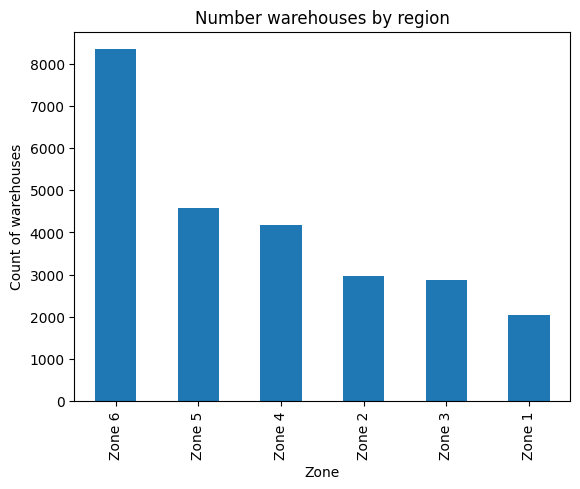

In [102]:
WH_counts = df['WH_regional_zone'].value_counts().sort_values(ascending=False)
WH_counts.plot(kind="bar")
plt.title('Number warehouses by region')
plt.ylabel('Count of warehouses')
plt.xlabel('Zone')
plt.show()

The 'num_refill_req_l3m' column

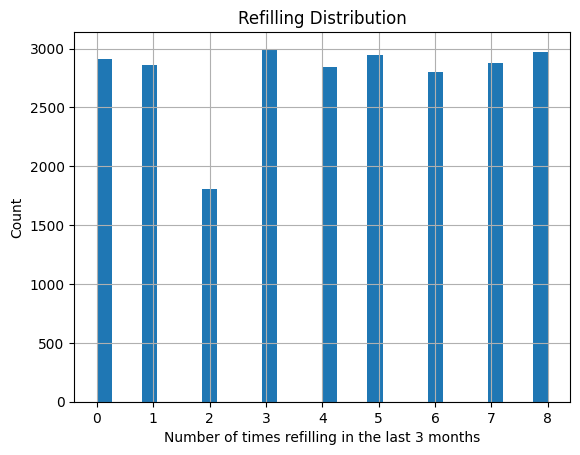

In [84]:
df['num_refill_req_l3m'].hist(bins='auto')
plt.xlabel('Number of times refilling in the last 3 months')
plt.ylabel('Count')
plt.title('Refilling Distribution')
plt.show()

The 'transport_issue_l1y' column

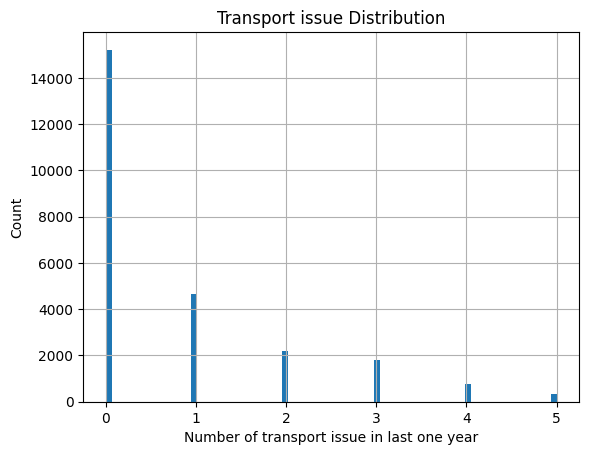

In [85]:
df['transport_issue_l1y'].hist(bins='auto')
plt.xlabel('Number of transport issue in last one year')
plt.ylabel('Count')
plt.title('Transport issue Distribution')
plt.show()

The 'Competitor_in_mkt' column

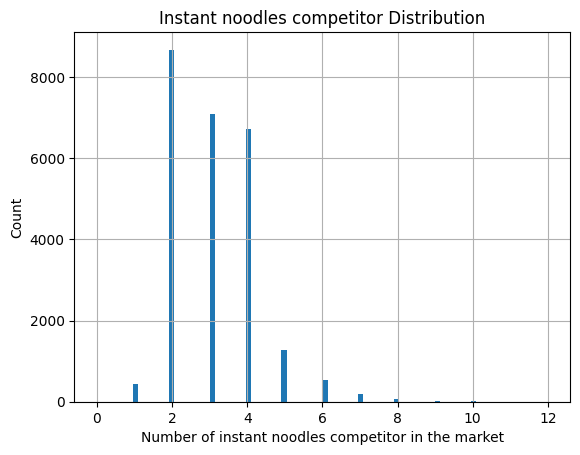

In [86]:
df['Competitor_in_mkt'].hist(bins='auto')
plt.xlabel('Number of instant noodles competitor in the market')
plt.ylabel('Count')
plt.title('Instant noodles competitor Distribution')
plt.show()

The 'retail_shop_num' column

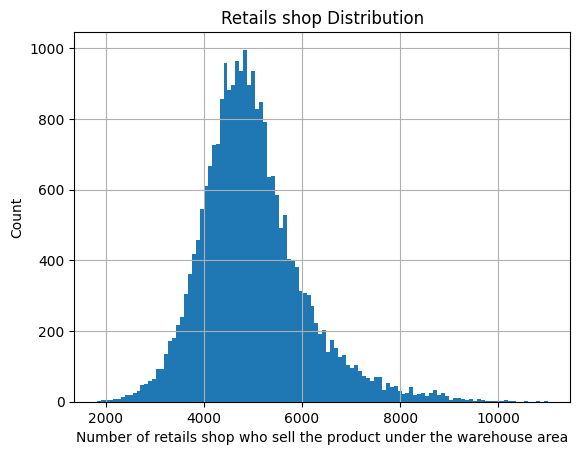

In [87]:
df['retail_shop_num'].hist(bins='auto')
plt.xlabel('Number of retails shop who sell the product under the warehouse area')
plt.ylabel('Count')
plt.title('Retails shop Distribution')
plt.show()

The 'wh_owner_type' column

Text(0.5, 1.0, 'wh_owner_type : Owned or Rented')

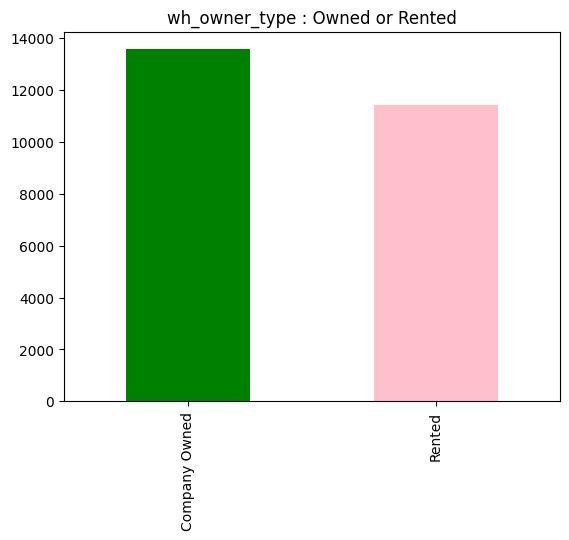

In [88]:
wh_owner_type = df['wh_owner_type'].value_counts()
wh_owner_type.plot(kind='bar',color=['green','pink'])
plt.title('wh_owner_type : Owned or Rented')

The 'distributor_num' column

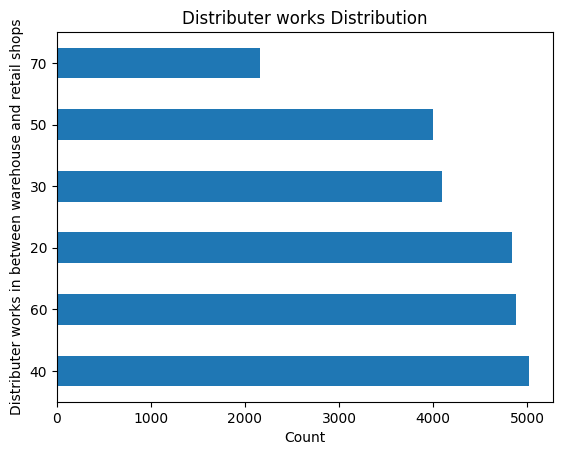

In [94]:
distributor = df['distributor_num'].round(-1).value_counts()
distributor.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Distributer works in between warehouse and retail shops')
plt.title('Distributer works Distribution')
plt.show()

The 'flood_impacted' column

Text(0.5, 1.0, 'flood_impacted: 0 or 1')

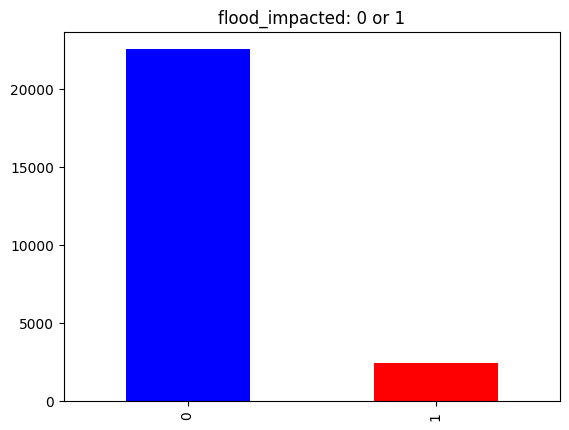

In [90]:
flood_impacted = df['flood_impacted'].value_counts()
flood_impacted.plot(kind='bar',color=['blue','red'])
plt.title('flood_impacted: 0 or 1')

The 'flood_proof' column

Text(0.5, 1.0, 'flood_proof: 0 or 1')

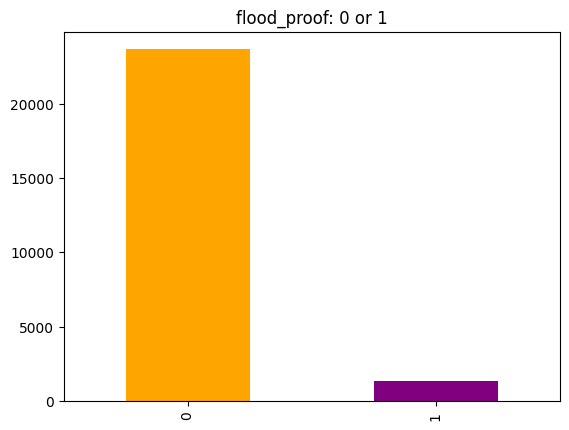

In [91]:
flood_proof = df['flood_proof'].value_counts()
flood_proof.plot(kind='bar',color=['orange','purple'])
plt.title('flood_proof: 0 or 1')

The 'electric_supply' column

Text(0.5, 1.0, 'electric_supply: 0 or 1')

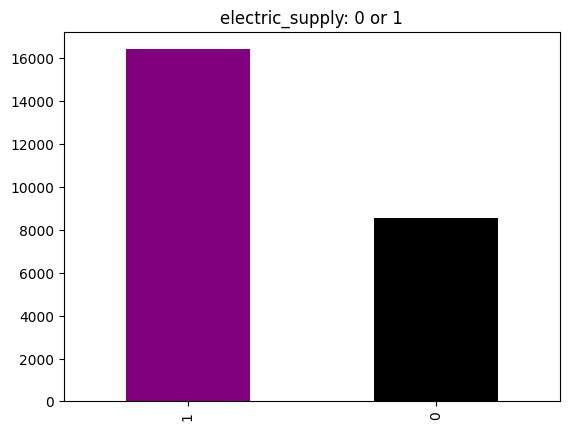

In [92]:
electric_supply = df['electric_supply'].value_counts()
electric_supply.plot(kind='bar',color=['purple','black'])
plt.title('electric_supply: 0 or 1')

The 'dist_from_hub' column

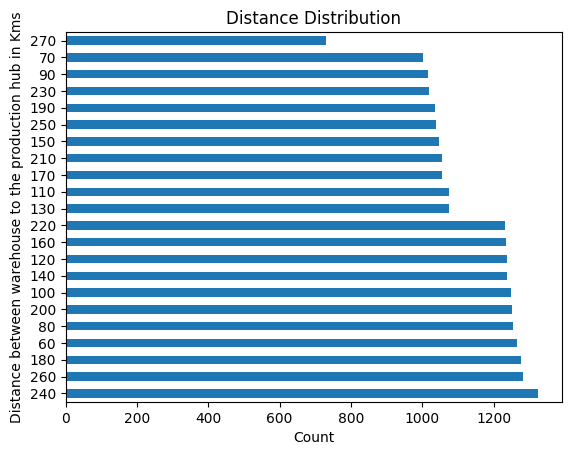

In [118]:
distributor= df['dist_from_hub'].round(-1).value_counts()
distributor.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Distance between warehouse to the production hub in Kms')
plt.title('Distance Distribution')
plt.show()

The 'workers_num' column

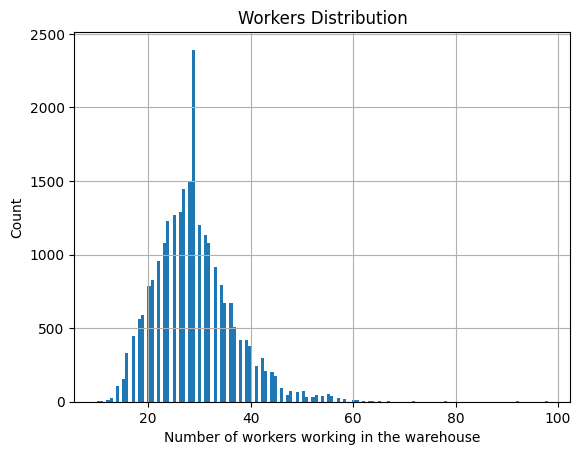

In [100]:
df['workers_num'].hist(bins='auto')
plt.xlabel('Number of workers working in the warehouse')
plt.ylabel('Count')
plt.title('Workers Distribution')
plt.show()

The 'wh_est_year' column

In [109]:
df['wh_est_year'] = df['wh_est_year'].astype(int)

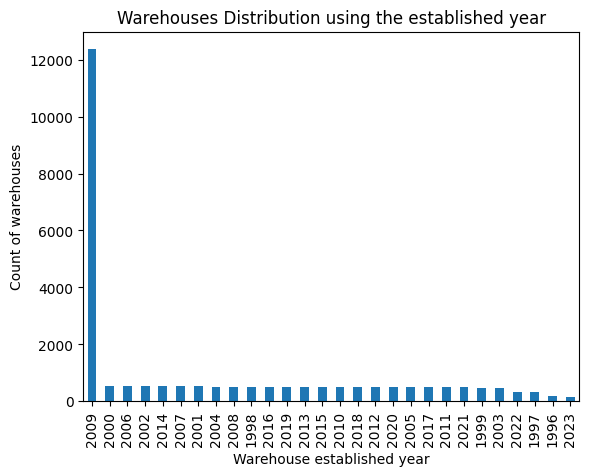

In [113]:
WHY_counts = df['wh_est_year'].value_counts().sort_values(ascending=False)
WHY_counts.plot(kind="bar")
plt.title('Warehouses Distribution using the established year')
plt.ylabel('Count of warehouses')
plt.xlabel('Warehouse established year')
plt.show()

The 'storage_issue_reported_l3m' column

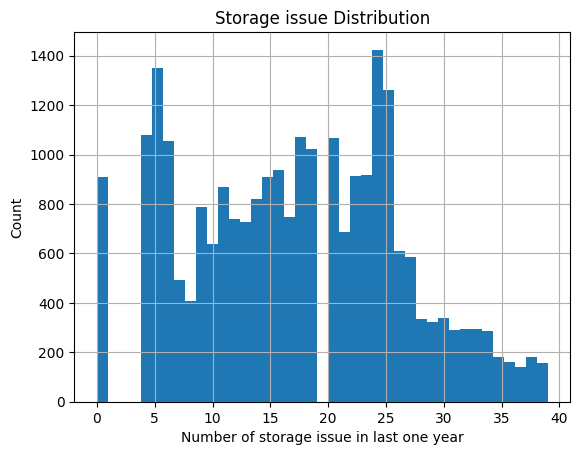

In [121]:
df['storage_issue_reported_l3m'].hist(bins='auto')
plt.xlabel('Number of storage issue in last one year')
plt.ylabel('Count')
plt.title('Storage issue Distribution')
plt.show()

The 'temp_reg_mach' column

Text(0.5, 1.0, 'temp_reg_mach: 0 or 1')

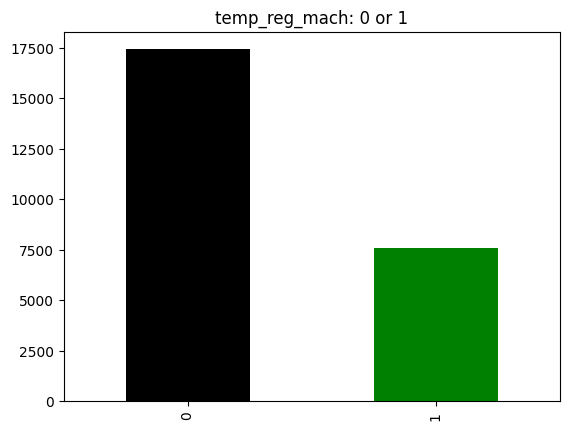

In [124]:
temp_reg_mach = df['temp_reg_mach'].value_counts()
temp_reg_mach.plot(kind='bar',color=['black', 'green'])
plt.title('temp_reg_mach: 0 or 1')

The 'approved_wh_govt_certificate' column


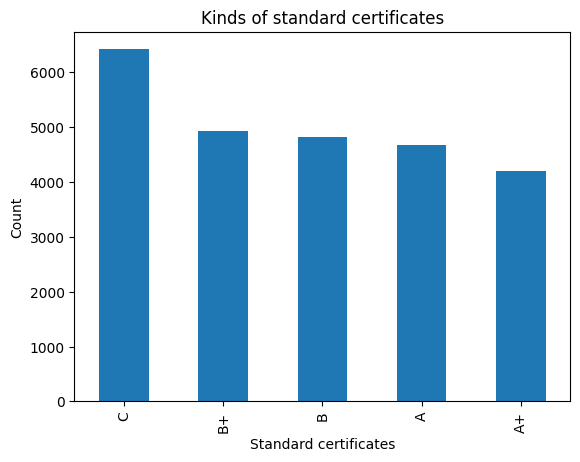

In [127]:
WH_Cf_counts = df['approved_wh_govt_certificate'].value_counts().sort_values(ascending=False)
WH_Cf_counts.plot(kind="bar")
plt.title('Kinds of standard certificates')
plt.ylabel('Count')
plt.xlabel('Standard certificates')
plt.show()

The 'wh_breakdown_l3m' column

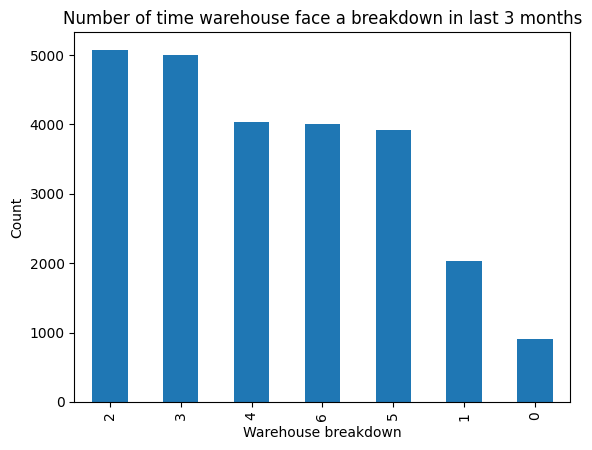

In [129]:
WH_bk_counts = df['wh_breakdown_l3m'].value_counts().sort_values(ascending=False)
WH_bk_counts.plot(kind="bar")
plt.title('Number of time warehouse face a breakdown in last 3 months')
plt.ylabel('Count')
plt.xlabel('Warehouse breakdown')
plt.show()

The 'govt_check_l3m' column

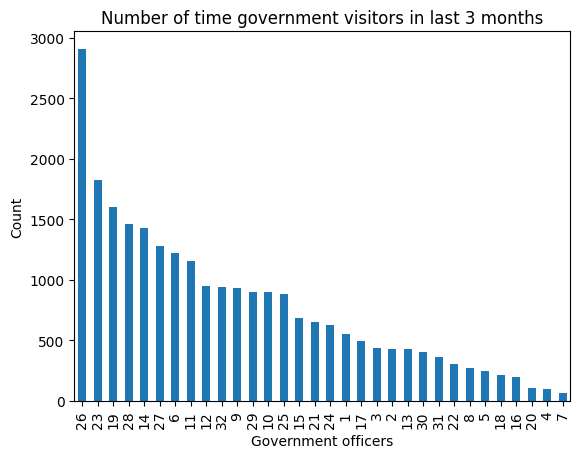

In [134]:
govt_counts = df['govt_check_l3m'].value_counts().sort_values(ascending=False)
govt_counts.plot(kind="bar")
plt.title('Number of time government visitors in last 3 months')
plt.ylabel('Count')
plt.xlabel('Government officers')
plt.show()

The target: The 'product_wg_ton' column

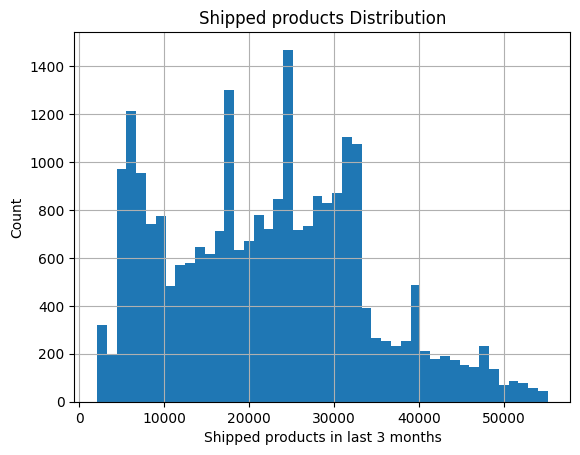

In [137]:
df['product_wg_ton'].hist(bins='auto')
plt.xlabel('Shipped products in last 3 months')
plt.ylabel('Count')
plt.title('Shipped products Distribution')
plt.show()